# 03b: Face Detection with dlib

Use dlib's HoG/SVG detector to locate a face


In [1]:
import os
import os.path as osp
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from utils import imx
from config import config as cfg

In [2]:
# https://github.com/davisking/dlib
import dlib

In [5]:
# init dlib
dlib_predictor_path = osp.join(cfg.MODELS_DIR,'dlib/shape_predictor_68_face_landmarks.dat')
predictor = dlib.shape_predictor(dlib_predictor_path)
detector = dlib.get_frontal_face_detector()

RuntimeError: Unable to open /Users/adam/work/undisclosed/karlsruhe/computer_vision_workshop/data_bodega/models/dlib/shape_predictor_68_face_landmarks.dat

In [6]:
def detect_faces_dlib(im,pyramids=0):
    rects = detector(im, pyramids)
    faces = [ (r.left(),r.top(),r.right(),r.bottom()) for r in rects] #x1,y1,x2,y2
    return faces

In [7]:
# Read an image and display it
fpath = osp.join(cfg.IMAGES_DIR,'test/obama.jpg')
im = cv2.imread(fpath)

In [8]:
# Draw high-confidence faces
faces = detect_faces_dlib(im,pyramids=0)
print("Found {} face(s)".format(len(faces)))

Found 1 face(s)


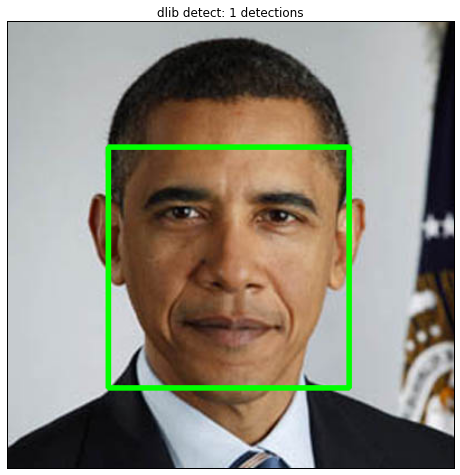

In [11]:
# Draw faces
dst = im.copy()
for face in faces:
    x1,y1,x2,y2 = face
    cv2.rectangle(dst,(x1,y1),(x2,y2),(0,255,0),3)

title='dlib detect: {} detections'.format(len(faces))
imx.pltimg(dst,mode='bgr',title=title)

In [12]:
# Save and compare detection to Haarcascade
fpath_out = osp.join(cfg.OUTPUT_DIR,'ch4_dlb_face.png')
cv2.imwrite(fpath_out,dst)

True